In [12]:
# load libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os

# see process_data.py
import process_data as data

In [13]:
# load all csvs 
er_data_path = os.path.join("..", "data", "emergency_department_characteristics")
er_data = glob.glob(os.path.join(er_data_path, "*.csv")) 
print(len(er_data)) # 2005 - 2020 data

16


    ZIPCODE                                           geometry
0     90001  POLYGON ((-118.24338 33.98924, -118.24333 33.9...
1     90002  POLYGON ((-118.23431 33.96101, -118.23425 33.9...
2     90003  POLYGON ((-118.28285 33.97597, -118.28285 33.9...
3     90004  POLYGON ((-118.28410 34.08349, -118.28425 34.0...
4     90005  MULTIPOLYGON (((-118.33541 34.06179, -118.3350...
..      ...                                                ...
252   91790  POLYGON ((-117.94085 34.09248, -117.93997 34.0...
253   91791  POLYGON ((-117.91660 34.08645, -117.91660 34.0...
254   91792  POLYGON ((-117.89061 34.00858, -117.89061 34.0...
255   91801  POLYGON ((-118.13472 34.08512, -118.13472 34.0...
256   91803  POLYGON ((-118.15469 34.09042, -118.15469 34.0...

[257 rows x 2 columns]


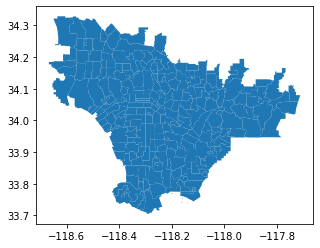

In [14]:
# load zipcode data 
zipcodes_shp = os.path.join("..", "processed", "collapsed_measures", "zipcodes_processed.shp") 
zipcodes = gpd.read_file(zipcodes_shp)
zipcodes["ZIPCODE"] = zipcodes["ZIPCODE"].astype("string").str[0:5]
print(zipcodes)

zipcodes.plot()
plt.show()

In [16]:
# create df to store final data 
processed_data = pd.DataFrame()

In [22]:
# open up a csv file, extract zipcodes 
ex_csv = er_data[0]
ex_df = pd.read_csv(ex_csv)

# get rows of relevant zipcodes
pattern = '|'.join(zipcodes["ZIPCODE"].astype("string")) # regex of all zipcode ids; | = or
ex_df["FAC_ZIPCODE"] = ex_df["FAC_ZIPCODE"].astype("string").str[0:5]
filtered_df = ex_df[ex_df["FAC_ZIPCODE"].str.contains(pattern)]

# merge repeat zipcodes 
merged_df = filtered_df.groupby("FAC_ZIPCODE").sum()
print(merged_df) # only 59 zipcodes

# # check how much data there is for la county 
# la_county = ex_df[ex_df["COUNTY"] == "Los Angeles"]
# merged_county_df = la_county.groupby("FAC_ZIPCODE").sum()
# print(merged_county_df) # only 67

              oshpd_id  oshpd_id9  fac_id  \
FAC_ZIPCODE                                 
90007        106190581  106190581  190581   
90015        106190125  106190125  190125   
90017        106190392  106190392  190392   
90019        106190534  106190534  190534   
90023        212380454  212380454  380454   
90027        318570981  318570981  570981   
90033        318572574  318572574  572574   
90034        106190434  106190434  190434   
90048        106190555  106190555  190555   
90057        106190762  106190762  190762   
90059        106191230  106191230  191230   
90095        106190796  106190796  190796   
90241        106190243  106190243  190243   
90247        106190521  106190521  190521   
90255        106190197  106190197  190197   
90262        106190754  106190754  190754   
90291        106190500  106190500  190500   
90301        212380378  212380378  380378   
90404        212381443  212381443  381443   
90502        106191227  106191227  191227   
90503     

In [35]:
# merged_df.reset_index(inplace=True)
# ZIPCODES are different for each file!!! ummmmmmmmmmm
ex_df2 = pd.read_csv(er_data[1])
test_df = ex_df2[ex_df2["FAC_ZIPCODE"].isin(merged_df["FAC_ZIPCODE"].to_list())]
test_df2 = ex_df2[ex_df2["FAC_ZIPCODE"].str.contains(pattern, na=False)]
print(len(test_df))
print(len(test_df2))
test_df = test_df.groupby("FAC_ZIPCODE").sum()
test_df2 = test_df2.groupby("FAC_ZIPCODE").sum()
print(len(test_df))
print(len(test_df2))


65
71
55
61


In [21]:
# confirm that all files have the same zipcodes 
merged_df.reset_index(inplace=True)
expected = merged_df["FAC_ZIPCODE"]

for csv in er_data: 
    df = pd.read_csv(ex_csv)
    group_col = df.filter(regex="FAC_ZIPCODE|DBA_ZIP_CODE").columns[0]
    # filtered = df[df[group_col].str.contains(pattern)]
    filtered = df[df[group_col].isin(expected.to_list())]
    filtered.loc[:, group_col] = filtered.loc[:, group_col].astype("string").str[0:5]
    filtered = filtered.groupby(group_col).sum()
    filtered.reset_index(inplace=True)
    actual = filtered[group_col].astype("string")
    print(actual)
    # actual = df[filtered.str.contains(pattern)].filter(regex="FAC_ZIPCODE|DBA_ZIP_CODE").squeeze().astype("string").str[0:5] 
    if (not actual.equals(expected)):
        raise Exception(f"Files have different zipcodes for {csv}")

0     90007
1     90015
2     90017
3     90019
4     90023
5     90027
6     90033
7     90034
8     90048
9     90057
10    90059
11    90095
12    90241
13    90247
14    90255
15    90262
16    90291
17    90301
18    90404
19    90502
20    90503
21    90602
22    90605
23    90623
24    90640
25    90650
26    90706
27    90710
28    90712
29    90716
30    90723
31    90732
32    90804
33    90806
34    91007
35    91105
36    91204
37    91206
38    91208
39    91345
40    91352
41    91356
42    91367
43    91402
44    91403
45    91405
46    91436
47    91706
48    91723
49    91733
50    91740
51    91754
52    91767
53    91773
54    91776
55    91790
56    91801
Name: FAC_ZIPCODE, dtype: string


Exception: Files have different zipcodes for ..\data\emergency_department_characteristics\2005-hospital-emergency-department-characteristics-by-facility-pivot-profile.csv

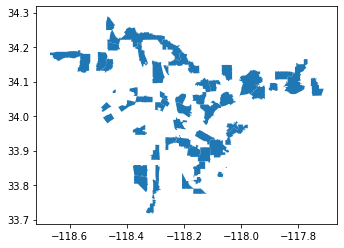

In [ ]:
# plot filtered zipcodes, and use going forward 
merged_df.reset_index(inplace=True)

zipcodes_filtered = zipcodes[zipcodes["ZIPCODE"].isin(list(merged_df["FAC_ZIPCODE"]))]
zipcodes_filtered.plot()
plt.show()

In [11]:
filtered_zipcodes = merged_df["FAC_ZIPCODE"]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): # view entire series
#     print(filtered_zipcodes)


KeyError: 'FAC_ZIPCODE'

In [9]:
# consts for data to extract
# exclude births; categorization is inconsistent across years, and has minimal counts
diag_groups_names = [ 
    "PerinatalDisorders",
    "PregnancyBirthPuerperium",
    "CongenitalAnomalies",
    "BloodBloodformingOrgans",
    "Circulatory",
    "Digestive",
    "Endocrine",
    "Respiratory",
    "NervousSensory",
    "Musculoskeletal",
    "Neoplasms",
    "Genitourinary", 
    "Infections",
    "InjuriesPoisoning",
    "MentalIllness",
    "Skin",
    "Symptoms",
    "Other"
]

diag_groups_names_no_nervous = [ 
    "PerinatalDisorders",
    "PregnancyBirthPuerperium",
    "CongenitalAnomalies",
    "BloodBloodformingOrgans",
    "Circulatory",
    "Digestive",
    "Endocrine",
    "Respiratory",
    "Musculoskeletal",
    "Neoplasms",
    "Genitourinary", 
    "Infections",
    "InjuriesPoisoning",
    "MentalIllness",
    "Skin",
    "Symptoms",
    "Other"
]

diag_groups_2005_2014 = [
    "Dx_Perinatal_disorders", 
    "Dx_All_Pregnancies", 
    "Dx_Congenital_anomalies", 
    "Dx_Blood_Bloodforming_organs",
    "Dx_Circulatory", 
    "Dx_Digestive", 
    "Dx_Endocrine_Metabolism", 
    "Dx_Respiratory", 
    "Dx_Nervous_Sensory_Systems", 
    "Dx_Musculoskeletal",
    "Dx_Neoplasms", 
    "Dx_Genitourinary", 
    "Dx_Infections", 
    "Dx_Injuries_Drugs_Complications", 
    "Dx_Psychoses_Neuroses", 
    "Dx_Skin_disorders", 
    "Dx_Symptoms", 
    "Dx_Other_Reasons"
]

# no nervous + sensory; need to merge (see below)
diag_groups_2016_2018 = [
    "DX_Perinatal_Disorders",
    "DX_All_Pregnancies"	
    "DX_Birth_Defects",	
    "DX_Blood_Disorders",		
    "DX_Circulatory_System",	
    "DX_Digestive_System",
    "DX_Endocrine_Diseases",	
    "DX_Respiratory_System",
    "DX_Musculoskeletal_System",
    "DX_Cancer",
    "DX_Genitourinary_System",
    "DX_Infections",
    "DX_Injuries_Poisonings",
    "DX_Mental_Disorders",
    "DX_Skin_Disorders",
    "DX_Symptoms",
    "DX_Other_Reasons"
]	

diag_groups_2016_2018_merge = [
    "DX_Nervous_System", 
    "DX_Ear_Disorders", 
    "DX_Eye_Disorders"
]

# ignores dx_Unacceptable_principal_diagno; are from mismatches btwn icd9 and icd10
# no nervous + sensory; need to merge
diag_groups_2019_2020 = [
    "dx_Certain_Perinatal_Conditions",
    "dx_Pregnancy_Childbirth",
    "dx_Congenital",
    "dx_Diseases_of_the_Blood",
    "dx_Circulatory",		
    "dx_Digestive",
    "dx_Endocrine",
    "dx_Respiratory",
    "dx_Musculoskeletal",	
    "dx_Neoplasms",
    "dx_Genitourinary",
    "dx_Infectious",
    "dx_Injury_Poisoning",
    "dx_MentalHealth",
    "dx_Skin",
    "dx_Symptoms_Signs_NEC", 
    "dx_Factors_Influencing_Health_St" # same as "Other", according to codes
]

diag_groups_2019_2020_merge = [
    "dx_Nervous_System", 
    "dx_Ear", 
    "dx_Eye"
]

age_groups_cols = [
    "Age_Under_1",
    "Age_01_09",
    "Age_10_19",
    "Age_20_29",
    "Age_30_39",	
    "Age_40_49",
    "Age_50_59",
    "Age_60_69",
    "Age_70_79",	
    "Age_80_"	
]

age_groups_names = [
    "Age_Under_1",
    "Age_01_09",
    "Age_10_19",
    "Age_20_29",
    "Age_30_39",	
    "Age_40_49",
    "Age_50_59",
    "Age_60_69",
    "Age_70_79",	
    "Age_80_and_Over"	
]

# dicts, consts
age_groups = dict(zip(age_groups_cols, age_groups_names))
ed_visits = dict(ED_Visit = "EDvisits")

extract_2005_2014 = dict(zip(diag_groups_2005_2014, diag_groups_names))
extract_2005_2014.update(age_groups)
extract_2005_2014.update(ed_visits)

# 2015 doesn't have prinicpal diag groups, bc of switch from icd9 to icd10 codes
# (see raw data files)
extract_2015 = age_groups
extract_2015.update(ed_visits)

extract_2016_2018 = dict(zip(diag_groups_2016_2018, diag_groups_names))
extract_2016_2018.update(age_groups)
extract_2016_2018.update(ed_visits)

extract_2019_2020 = dict(zip(diag_groups_2019_2020, diag_groups_names))
extract_2019_2020.update(age_groups)
extract_2019_2020.update(ed_visits)

merge_2005_2014 = None
merge_2015 = None
merge_2016_2018 = dict(NervousSensory = diag_groups_2016_2018_merge)
merge_2019_2020 = dict(NervousSensory = diag_groups_2019_2020_merge)

paths_2005_2014 = dict(zip(range(2005, 2015), er_data[0:10]))
paths_2015 = {2015: er_data[10]}
paths_2016_2018 = dict(zip(range(2016, 2019), er_data[11:14]))
paths_2019_2020 = dict(zip(range(2019, 2021), er_data[14:16]))

print(extract_2005_2014)
print(merge_2005_2014)
print(paths_2005_2014)

{'Dx_Perinatal_disorders': 'PerinatalDisorders', 'Dx_All_Pregnancies': 'PregnancyBirthPuerperium', 'Dx_Congenital_anomalies': 'CongenitalAnomalies', 'Dx_Blood_Bloodforming_organs': 'BloodBloodformingOrgans', 'Dx_Circulatory': 'Circulatory', 'Dx_Digestive': 'Digestive', 'Dx_Endocrine_Metabolism': 'Endocrine', 'Dx_Respiratory': 'Respiratory', 'Dx_Nervous_Sensory_Systems': 'NervousSensory', 'Dx_Musculoskeletal': 'Musculoskeletal', 'Dx_Neoplasms': 'Neoplasms', 'Dx_Genitourinary': 'Genitourinary', 'Dx_Infections': 'Infections', 'Dx_Injuries_Drugs_Complications': 'InjuriesPoisoning', 'Dx_Psychoses_Neuroses': 'MentalIllness', 'Dx_Skin_disorders': 'Skin', 'Dx_Symptoms': 'Symptoms', 'Dx_Other_Reasons': 'Other', 'Age_Under_1': 'Age_Under_1', 'Age_01_09': 'Age_01_09', 'Age_10_19': 'Age_10_19', 'Age_20_29': 'Age_20_29', 'Age_30_39': 'Age_30_39', 'Age_40_49': 'Age_40_49', 'Age_50_59': 'Age_50_59', 'Age_60_69': 'Age_60_69', 'Age_70_79': 'Age_70_79', 'Age_80_': 'Age_80_and_Over', 'ED_Visit': 'EDvisit

In [63]:
# iterate through 2005-2014 for now
all_zipcodes = zipcodes["ZIPCODE"].to_list()
zipcode_colnames = "DBA_ZIP_CODE|FAC_ZIPCODE"
for year in paths_2005_2014:
    print(f"Getting data for {year}...")
    temp_dict = dict()

    # create Data object 
    data_obj = data.Data(
        path=paths_2005_2014[year], 
        cols_to_extract=extract_2005_2014, 
        cols_to_merge=merge_2005_2014 
    )
    df = data_obj.data_read_csv()

    # extract zipcodes, format, group by/merge rows w common zipcodes 
    zipcode_col = df.filter(regex=zipcode_colnames).columns[0]
    print(zipcode_col)
    df[zipcode_col] = df[zipcode_col].astype("string").str[0:5]
    filtered_df = df[df[zipcode_col].isin(all_zipcodes)]
    filtered_df = filtered_df.groupby(zipcode_col).sum()
    filtered_df.reset_index(inplace=True)
    
    # pattern = '|'.join(filtered_zipcodes) # regex of all zipcode ids; | = or
    # formatted = df.filter(regex="FAC_ZIPCODE|DBA_ZIP_CODE").squeeze().astype("string").str[0:5] # some csvs have zipcodes as floats; remove decimals
    # filtered = df[formatted.str.contains(pattern, na=False)] # if value is nan, replace w false
    # filtered = df[formatted.isin(list(filtered_zipcodes))]
    
    # extract
    extracted_cols = data_obj.data_extract_cols(filtered_df)
    if (not extracted_cols.empty):
        extracted_dict = extracted_cols.to_dict(orient="list")
        temp_dict.update(extracted_dict)
    
    # merge and extract 
    merged_cols = data_obj.data_merge_cols(filtered_df)
    if (not merged_cols.empty):
        merged_dict = merged_cols.to_dict(orient="list")
        temp_dict.update(merged_dict)

    # add cols for year and zipcode and geos
    curr_zips =  filtered_df[zipcode_col].to_list()
    curr_geos = zipcodes["geometry"][zipcodes["ZIPCODE"].isin(curr_zips)]
    temp_dict["ZIPCODE"] = curr_zips
    temp_dict["YEAR"] = [year] * len(curr_zips)
    temp_dict["geometry"] = curr_geos.to_list()

    # add rows for missing zipcodes (with na values) 
    missing_info = zipcodes[~zipcodes["ZIPCODE"].isin(curr_zips)]
    missing_info.reset_index(drop=True, inplace=True)

    missing_data = []
    len_nas = len(temp_dict) - 3
    for i in range(0, len(missing_info)):
        zip = missing_info.loc[i, "ZIPCODE"]
        geo = missing_info.loc[i, "geometry"]
        missing_data.append([year, zip] + [pd.NA] * len_nas + [geo])
    
    temp_df = pd.DataFrame(temp_dict)

    # move year and zip to front
    temp_df.insert(0, "YEAR", temp_df.pop("YEAR"))
    temp_df.insert(1, "ZIPCODE", temp_df.pop("ZIPCODE"))
    temp_df._append(missing_data)

    # append to processed_data 
    processed_data = pd.concat([processed_data, temp_df], ignore_index=True)

    # if (processed_data.empty): # if empty
    #     processed_data = temp_df
    # else:
    #     processed_data._append(temp_df)
    
    print(len(processed_data))
    

Getting data for 2005...
FAC_ZIPCODE
118
Getting data for 2006...
FAC_ZIPCODE
178
Getting data for 2007...
FAC_ZIPCODE
236
Getting data for 2008...
FAC_ZIPCODE
292
Getting data for 2009...
FAC_ZIPCODE
351
Getting data for 2010...
FAC_ZIPCODE
409
Getting data for 2011...
FAC_ZIPCODE
467
Getting data for 2012...
DBA_ZIP_CODE
529
Getting data for 2013...
DBA_ZIP_CODE
589
Getting data for 2014...
DBA_ZIP_CODE
648


In [64]:
processed_data

,YEAR,ZIPCODE,PerinatalDisorders,PregnancyBirthPuerperium,CongenitalAnomalies,BloodBloodformingOrgans,Circulatory,Digestive,Endocrine,Respiratory,...,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_and_Over,EDvisits,geometry
0,2005,90007,4.0,0.0,16.0,3.0,9.0,13.0,1.0,22.0,...,2670.0,453.0,658.0,554.0,278.0,120.0,47.0,26.0,7156.0,POLYGON ((-118.29296622796872 34.0406630804246...
1,2005,90015,47.0,1628.0,9.0,102.0,523.0,1670.0,521.0,3608.0,...,4621.0,6983.0,5679.0,5016.0,3176.0,1322.0,751.0,502.0,36931.0,POLYGON ((-118.27482351240772 34.0518416186684...
2,2005,90017,47.0,937.0,15.0,69.0,696.0,1772.0,450.0,2098.0,...,1736.0,4566.0,3773.0,3621.0,2757.0,1608.0,1233.0,1006.0,22253.0,POLYGON ((-118.26838509638021 34.0611796534540...
3,2005,90019,2.0,95.0,2.0,40.0,372.0,495.0,212.0,983.0,...,792.0,1803.0,1962.0,1967.0,1566.0,745.0,739.0,932.0,11034.0,POLYGON ((-118.32991112743373 34.0594036497372...
4,2005,90023,29.0,1107.0,3.0,32.0,289.0,1817.0,271.0,2943.0,...,2716.0,3142.0,2570.0,1979.0,1193.0,694.0,479.0,282.0,18746.0,POLYGON ((-118.18159569206574 33.9955921414446...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2014,91767,196.0,3193.0,18.0,431.0,2174.0,4621.0,1241.0,8419.0,...,9384.0,13333.0,10265.0,9554.0,9008.0,5877.0,3884.0,4339.0,81301.0,MULTIPOLYGON (((-117.73680313202918 34.1071090...
644,2014,91773,4.0,281.0,3.0,38.0,293.0,719.0,168.0,1216.0,...,1979.0,2634.0,2030.0,1925.0,1692.0,1108.0,688.0,829.0,14661.0,POLYGON ((-117.76788324045673 34.1651299258916...
645,2014,91776,68.0,538.0,5.0,73.0,329.0,952.0,304.0,1985.0,...,2546.0,2907.0,2518.0,2335.0,2176.0,1496.0,1102.0,1306.0,20431.0,POLYGON ((-118.09535477394606 34.1055120717037...
646,2014,91790,178.0,2192.0,16.0,179.0,717.0,2266.0,514.0,6035.0,...,6400.0,8317.0,6708.0,5127.0,4740.0,3140.0,2092.0,1857.0,50032.0,POLYGON ((-117.94084662927371 34.0924822704164...


In [45]:
for i in temp_dict.keys():
    print(i)
    print(len(temp_dict[i]))

PerinatalDisorders
57
PregnancyBirthPuerperium
57
CongenitalAnomalies
57
BloodBloodformingOrgans
57
Circulatory
57
Digestive
57
Endocrine
57
Respiratory
57
NervousSensory
57
Musculoskeletal
57
Neoplasms
57
Genitourinary
57
Infections
57
InjuriesPoisoning
57
MentalIllness
57
Skin
57
Symptoms
57
Other
57
Age_Under_1
57
Age_01_09
57
Age_10_19
57
Age_20_29
57
Age_30_39
57
Age_40_49
57
Age_50_59
57
Age_60_69
57
Age_70_79
57
Age_80_and_Over
57
EDvisits
57
ZIPCODE
59
YEAR
59
geometry
59


In [ ]:
filtered["FAC_ZIPCODE"]

0     90015
1     90017
3     90019
4     90023
5     90027
6     90033
7     90034
8     90048
9     90057
10    90059
12    90095
14    90241
15    90247
16    90255
17    90262
18    90291
19    90301
20    90404
21    90502
22    90503
23    90505
24    90602
25    90605
26    90623
27    90640
28    90650
31    90706
32    90710
33    90712
34    90716
36    90732
38    90804
39    90806
40    91007
41    91105
42    91204
43    91206
44    91208
48    91345
49    91352
51    91356
53    91367
54    91402
55    91403
56    91405
57    91436
58    91505
59    91706
62    91723
63    91733
64    91740
66    91754
68    91767
69    91773
70    91776
72    91790
73    91801
Name: FAC_ZIPCODE, dtype: string

In [ ]:
geos = zipcodes[zipcodes["ZIPCODE"].isin(list(filtered_zips))]
print(filtered_zips.squeeze().to_list())



['90007', '90015', '90017', '90019', '90023', '90027', '90033', '90034', '90048', '90057', '90059', '90095', '90241', '90247', '90255', '90262', '90291', '90301', '90404', '90502', '90503', '90505', '90602', '90605', '90623', '90640', '90650', '90706', '90710', '90712', '90716', '90723', '90732', '90804', '90806', '91007', '91105', '91204', '91206', '91208', '91345', '91352', '91356', '91367', '91402', '91403', '91405', '91436', '91505', '91706', '91723', '91733', '91740', '91754', '91767', '91773', '91776', '91790', '91801']
